In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def cubic_spline_interpolation(x, y, dd0, ddn):
    n = len(x)
    h = np.diff(x)
    alpha = np.zeros(n)
    l = np.zeros(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    c = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)

    alpha[0] = dd0
    alpha[-1] = ddn
    for i in range(1, n - 1):
        alpha[i] = 3 * (y[i + 1] - y[i]) / h[i] - 3 * (y[i] - y[i - 1]) / h[i - 1]

    l[0] = 1
    mu[0] = 0
    z[0] = 0

    for i in range(0, n - 1):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n - 1] = 1
    z[n - 1] = (alpha[n - 1] - h[n - 2] * z[n - 2]) / l[n - 1]
    c[n - 1] = z[n - 1]

    for j in range(n - 2, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        b[j] = (y[j + 1] - y[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    return b, c, d

In [81]:
def interpolate(x, y, xi, b, c, d):
    n = len(x)
    yi = np.zeros_like(xi)

    for i in range(n - 1):
        index = np.logical_and(xi >= x[i], xi <= x[i + 1])
        yi[index] = y[i] + b[i] * (xi[index] - x[i]) + c[i] * (xi[index] - x[i]) ** 2 + d[i] * (xi[index] - x[i]) ** 3

    return yi

In [138]:
def Plot_Graph(x, y, b, c, d):
  xi = np.linspace(x.min(), x.max(), 100)
  yi = interpolate(x, y, xi, b, c, d)

  import matplotlib.pyplot as plt
  plt.plot(x, y, 'o', label='Data points')
  plt.plot(xi, yi, label='Interpolated spline', color = 'red')
  plt.legend()
  plt.show()

In [132]:
def Find_SORC(x, y, dd0, ddn):
  b, c, d = cubic_spline_interpolation(x, y, dd0, ddn)
  n = len(x)
  SORC = 0
  for xval in xi :
    for i in range(n - 1):
      if(xval >= x[i] and xval <= x[i + 1]):
        d1 = b[i] + 2 * c[i] * (xval - x[i]) + 3 * d[i] * (xval - x[i]) ** 2
        d2 = 2 * c[i] + 6 * d[i] * (xval - x[i])
    ROC = ((1 + d1**2)**1.5) / abs(d2)
    SORC += ROC ** 2
  return SORC

In [236]:
def Optimise(x, y, dd0, ddn):
  xi = np.linspace(x.min(), x.max(), 1000)
  epoch = 1000
  h = 1e-5
  lr = h * 0.0001
  print(Find_SORC(x, y, dd0, ddn))
  sorc = []
  for i in range (epoch):
    s0 = Find_SORC(x, y, dd0, ddn)
    s1 = Find_SORC(x, y, dd0 + h, ddn)
    s2 = Find_SORC(x, y, dd0, ddn + h)

    delta1 = (s1 - s0) / h
    delta2 = (s2 - s0) / h

    dd0 -= lr * delta1
    ddn -= lr * delta2

    sorc.append(Find_SORC(x, y, dd0, ddn))
  print(Find_SORC(x, y, dd0, ddn))
  b, c, d = cubic_spline_interpolation(x, y, dd0, ddn)
  #Plot_Graph(x, y, b, c, d)
  plt.plot(xi, sorc)
  plt.show()
  return b, c, d

50903542.20374134
46138483.450344


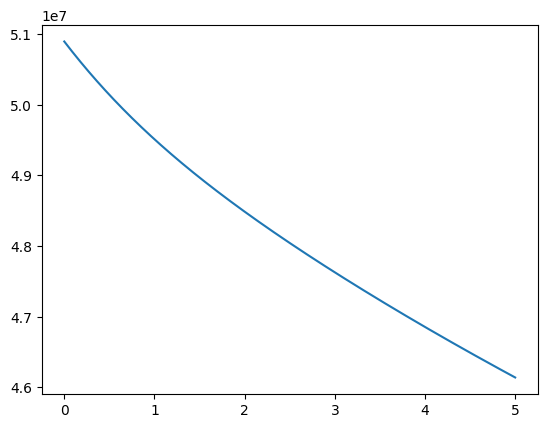

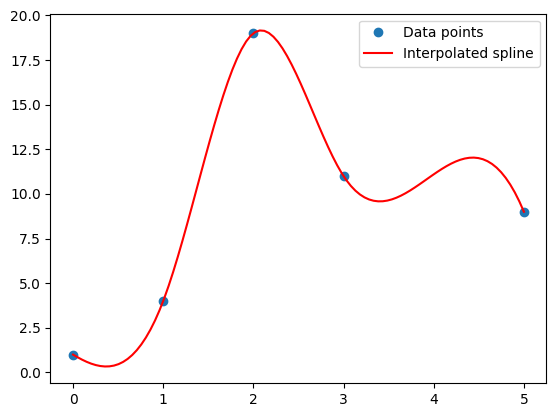

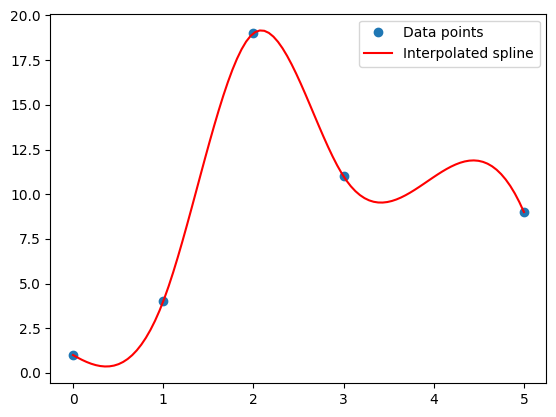

In [237]:
x = np.array([0, 1, 2, 3, 5])
y = np.array([1, 4, 19, 11, 9])

dd0 = 0
ddn = 0

b1, c1, d1 = cubic_spline_interpolation(x, y, dd0, ddn)
b2, c2, d2 = Optimise(x, y, dd0, ddn)
Plot_Graph(x, y, b1, c1, d1)
Plot_Graph(x, y, b2, c2, d2)